In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon
import folium

%matplotlib inline

In [2]:
df = pd.read_json(path_or_buf="sign_ins_formatted.json")
df

id       createdDateTime  \
0     a24a547c-71e2-47fc-97bb-81d7e4d5aa00  2024-04-06T16:44:27Z   
1     bd5a69d1-0a15-42e0-90da-073377702e00  2024-04-06T16:44:24Z   
2     452d6571-4dba-4ea5-8acf-777ac906b300  2024-04-06T16:44:17Z   
3     c4827fe9-ee3a-4d1e-a320-d166620aa500  2024-04-06T16:40:46Z   
4     d87909c1-c089-4336-be59-fe56ce5ba600  2024-04-06T16:39:31Z   
...                                    ...                   ...   
5297  f495a8aa-2cf1-449e-afed-2579fc408600  2024-03-07T18:31:20Z   
5298  937f1245-de51-4abb-882c-367019823700  2024-03-07T18:31:03Z   
5299  f495a8aa-2cf1-449e-afed-2579d0358600  2024-03-07T18:30:46Z   
5300  0890237d-aeae-464d-905b-17908bc7b400  2024-03-07T18:28:12Z   
5301  3cb8a923-341a-4d63-8b00-7cc108384f01  2024-03-07T18:09:45Z   

                           userDisplayName  \
0     a3bc732b-08dc-4ec2-b327-9dcf0c1eeafa   
1                              Tyler Neher   
2                           Tyler M. Neher   
3                           Tyler M. Neher   
4                           Tyler M. Neher   
...                                    ...   
5297                        Tyler M. Neher   
5298                        Tyler M. Neher   
5299                        Tyler M. Neher   
5300                        Tyler M. Neher   
5301                        Tyler M. Neher   

                         userPrincipalName  \
0     a3bc732b-08dc-4ec2-b327-9dcf0c1eeafa   
1                      tyler@neherdata.com   
2                      tyler@neherdata.com   
3                      tyler@neherdata.com   
4                      tyler@neherdata.com   
...                                    ...   
5297                   tyler@neherdata.com   
5298                   tyler@neherdata.com   
5299                   tyler@neherdata.com   
5300                   tyler@neherdata.com   
5301                   tyler@neherdata.com   

                                    userId  \
0     a3bc732b-08dc-4ec2-b327-9dcf0c1eeafa   
1     a3bc732b-08dc-4ec2-b327-9dcf0c1eeafa   
2     a3bc732b-08dc-4ec2-b327-9dcf0c1eeafa   
3     a3bc732b-08dc-4ec2-b327-9dcf0c1eeafa   
4     a3bc732b-08dc-4ec2-b327-9dcf0c1eeafa   
...                                    ...   
5297  a3bc732b-08dc-4ec2-b327-9dcf0c1eeafa   
5298  a3bc732b-08dc-4ec2-b327-9dcf0c1eeafa   
5299  a3bc732b-08dc-4ec2-b327-9dcf0c1eeafa   
5300  a3bc732b-08dc-4ec2-b327-9dcf0c1eeafa   
5301  a3bc732b-08dc-4ec2-b327-9dcf0c1eeafa   

                                     appId               appDisplayName  \
0     c44b4083-3bb0-49c1-b47d-974e53cbdf3c                 Azure Portal   
1     c44b4083-3bb0-49c1-b47d-974e53cbdf3c                 Azure Portal   
2     4813382a-8fa7-425e-ab75-3b753aab3abb  Microsoft Authenticator App   
3     af124e86-4e96-495a-b70a-90f90ab96707             OneDrive iOS App   
4     de8bc8b5-d9f9-48b1-a8ad-b748da725064               Graph Explorer   
...                                    ...                          ...   
5297  a81d90ac-aa75-4cf8-b14c-58bf348528fe       Microsoft Community v2   
5298  a81d90ac-aa75-4cf8-b14c-58bf348528fe       Microsoft Community v2   
5299  a81d90ac-aa75-4cf8-b14c-58bf348528fe       Microsoft Community v2   
5300  af124e86-4e96-495a-b70a-90f90ab96707             OneDrive iOS App   
5301  27922004-5251-4030-b22d-91ecd9a37ea4               Outlook Mobile   

                                    ipAddress  ipAddressFromResourceProvider  \
0                               69.141.220.21                            NaN   
1                               69.141.220.21                            NaN   
2                               69.141.220.21                            NaN   
3                               69.141.220.21                            NaN   
4                               69.141.220.21                            NaN   
...                                       ...                            ...   
5297  2600:1001:b112:cbee:8c5f:2fad:5454:f48e                            NaN   
5298  2600:1001:b112:cb

In [3]:
df.columns.to_list()

['id',
 'createdDateTime',
 'userDisplayName',
 'userPrincipalName',
 'userId',
 'appId',
 'appDisplayName',
 'ipAddress',
 'ipAddressFromResourceProvider',
 'clientAppUsed',
 'userAgent',
 'correlationId',
 'conditionalAccessStatus',
 'originalRequestId',
 'isInteractive',
 'tokenIssuerName',
 'tokenIssuerType',
 'clientCredentialType',
 'processingTimeInMilliseconds',
 'riskDetail',
 'riskLevelAggregated',
 'riskLevelDuringSignIn',
 'riskState',
 'riskEventTypes_v2',
 'resourceDisplayName',
 'resourceId',
 'resourceTenantId',
 'homeTenantId',
 'homeTenantName',
 'authenticationMethodsUsed',
 'authenticationRequirement',
 'signInIdentifier',
 'signInIdentifierType',
 'servicePrincipalName',
 'signInEventTypes',
 'servicePrincipalId',
 'federatedCredentialId',
 'userType',
 'flaggedForReview',
 'isTenantRestricted',
 'autonomousSystemNumber',
 'crossTenantAccessType',
 'servicePrincipalCredentialKeyId',
 'servicePrincipalCredentialThumbprint',
 'uniqueTokenIdentifier',
 'incomingTokenT

In [4]:
locations = df["location"]
locations[1]["geoCoordinates"]

{'altitude': None, 'latitude': 40.35863, 'longitude': -74.13705}

In [5]:
city = locations.apply(lambda x: x["city"])
state = locations.apply(lambda x: x["state"])
countryOrRegion = locations.apply(lambda x: x["countryOrRegion"])
altitude = locations.apply(lambda x: x["geoCoordinates"]).apply(
    lambda x: x["altitude"])
latitude = locations.apply(lambda x: x["geoCoordinates"]).apply(
    lambda x: x["latitude"])
longitude = locations.apply(lambda x: x["geoCoordinates"]).apply(
    lambda x: x["longitude"]
)

df["city"] = city
df["state"] = state
df["countryOrRegion"] = countryOrRegion
df["altitude"] = altitude
df["latitude"] = latitude
df["longitude"] = longitude


df

id       createdDateTime  \
0     a24a547c-71e2-47fc-97bb-81d7e4d5aa00  2024-04-06T16:44:27Z   
1     bd5a69d1-0a15-42e0-90da-073377702e00  2024-04-06T16:44:24Z   
2     452d6571-4dba-4ea5-8acf-777ac906b300  2024-04-06T16:44:17Z   
3     c4827fe9-ee3a-4d1e-a320-d166620aa500  2024-04-06T16:40:46Z   
4     d87909c1-c089-4336-be59-fe56ce5ba600  2024-04-06T16:39:31Z   
...                                    ...                   ...   
5297  f495a8aa-2cf1-449e-afed-2579fc408600  2024-03-07T18:31:20Z   
5298  937f1245-de51-4abb-882c-367019823700  2024-03-07T18:31:03Z   
5299  f495a8aa-2cf1-449e-afed-2579d0358600  2024-03-07T18:30:46Z   
5300  0890237d-aeae-464d-905b-17908bc7b400  2024-03-07T18:28:12Z   
5301  3cb8a923-341a-4d63-8b00-7cc108384f01  2024-03-07T18:09:45Z   

                           userDisplayName  \
0     a3bc732b-08dc-4ec2-b327-9dcf0c1eeafa   
1                              Tyler Neher   
2                           Tyler M. Neher   
3                           Tyler M. Neher   
4                           Tyler M. Neher   
...                                    ...   
5297                        Tyler M. Neher   
5298                        Tyler M. Neher   
5299                        Tyler M. Neher   
5300                        Tyler M. Neher   
5301                        Tyler M. Neher   

                         userPrincipalName  \
0     a3bc732b-08dc-4ec2-b327-9dcf0c1eeafa   
1                      tyler@neherdata.com   
2                      tyler@neherdata.com   
3                      tyler@neherdata.com   
4                      tyler@neherdata.com   
...                                    ...   
5297                   tyler@neherdata.com   
5298                   tyler@neherdata.com   
5299                   tyler@neherdata.com   
5300                   tyler@neherdata.com   
5301                   tyler@neherdata.com   

                                    userId  \
0     a3bc732b-08dc-4ec2-b327-9dcf0c1eeafa   
1     a3bc732b-08dc-4ec2-b327-9dcf0c1eeafa   
2     a3bc732b-08dc-4ec2-b327-9dcf0c1eeafa   
3     a3bc732b-08dc-4ec2-b327-9dcf0c1eeafa   
4     a3bc732b-08dc-4ec2-b327-9dcf0c1eeafa   
...                                    ...   
5297  a3bc732b-08dc-4ec2-b327-9dcf0c1eeafa   
5298  a3bc732b-08dc-4ec2-b327-9dcf0c1eeafa   
5299  a3bc732b-08dc-4ec2-b327-9dcf0c1eeafa   
5300  a3bc732b-08dc-4ec2-b327-9dcf0c1eeafa   
5301  a3bc732b-08dc-4ec2-b327-9dcf0c1eeafa   

                                     appId               appDisplayName  \
0     c44b4083-3bb0-49c1-b47d-974e53cbdf3c                 Azure Portal   
1     c44b4083-3bb0-49c1-b47d-974e53cbdf3c                 Azure Portal   
2     4813382a-8fa7-425e-ab75-3b753aab3abb  Microsoft Authenticator App   
3     af124e86-4e96-495a-b70a-90f90ab96707             OneDrive iOS App   
4     de8bc8b5-d9f9-48b1-a8ad-b748da725064               Graph Explorer   
...                                    ...                          ...   
5297  a81d90ac-aa75-4cf8-b14c-58bf348528fe       Microsoft Community v2   
5298  a81d90ac-aa75-4cf8-b14c-58bf348528fe       Microsoft Community v2   
5299  a81d90ac-aa75-4cf8-b14c-58bf348528fe       Microsoft Community v2   
5300  af124e86-4e96-495a-b70a-90f90ab96707             OneDrive iOS App   
5301  27922004-5251-4030-b22d-91ecd9a37ea4               Outlook Mobile   

                                    ipAddress  ipAddressFromResourceProvider  \
0                               69.141.220.21                            NaN   
1                               69.141.220.21                            NaN   
2                               69.141.220.21                            NaN   
3                               69.141.220.21                            NaN   
4                               69.141.220.21                            NaN   
...                                       ...                            ...   
5297  2600:1001:b112:cbee:8c5f:2fad:5454:f48e                            NaN   
5298  2600:1001:b112:cb

/var/folders/m4/r3wttq2j5hs_1mpf0t1yvhq80000gn/T/ipykernel_85315/2671292473.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  worldmap = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
/var/folders/m4/r3wttq2j5hs_1mpf0t1yvhq80000gn/T/ipykernel_85315/2671292473.py:9: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x, y, alpha=0.6, cmap="autumn")


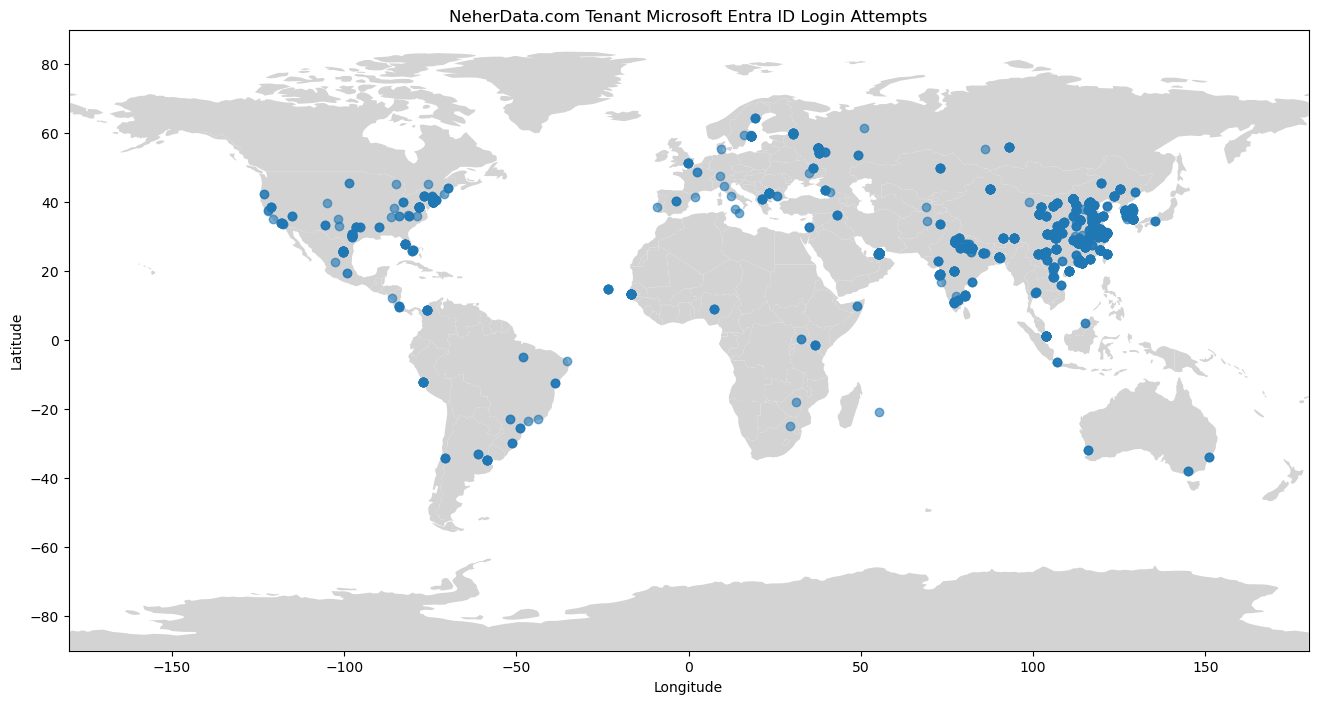

In [6]:
worldmap = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

# Creating axes and plotting world map
fig, ax = plt.subplots(figsize=(16, 10))
worldmap.plot(color="lightgrey", ax=ax)

x = df["longitude"]
y = df["latitude"]
plt.scatter(x, y, alpha=0.6, cmap="autumn")
# plt.colorbar(label='NeherData.com Tenant Microsoft Entra ID Login Attempts')

# Creating axis limits and title
plt.xlim([-180, 180])
plt.ylim([-90, 90])

plt.title("NeherData.com Tenant Microsoft Entra ID Login Attempts")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

In [7]:
# Make an empty map
m = folium.Map(location=[20, 0], tiles="CartoDB Voyager", zoom_start=2)

# Show the map
m

In [8]:
latlon_df = pd.DataFrame(
    data=df.dropna(subset=["latitude", "longitude"]),
    columns=["latitude", "longitude", "city", "state", "countryOrRegion"],
)
# latlon_df['latitude'] = df['latitude'].notna()


latlon_df

latitude  longitude             city       state countryOrRegion
1     40.35863  -74.13705         Lincroft  New Jersey              US
2     40.35863  -74.13705         Lincroft  New Jersey              US
3     40.35863  -74.13705         Lincroft  New Jersey              US
4     40.35863  -74.13705         Lincroft  New Jersey              US
5     40.35863  -74.13705         Lincroft  New Jersey              US
...        ...        ...              ...         ...             ...
5297  40.27322  -74.23018         Freehold  New Jersey              US
5298  40.27322  -74.23018         Freehold  New Jersey              US
5299  40.27322  -74.23018         Freehold  New Jersey              US
5300  40.27322  -74.23018         Freehold  New Jersey              US
5301  40.42598  -74.16610  Hazlet Township  New Jersey              US

[5295 rows x 5 columns]

In [9]:
# add marker one by one on the map
for i in range(0, len(latlon_df)):
    folium.Marker(
        location=[latlon_df.iloc[i]["latitude"],
                  latlon_df.iloc[i]["longitude"]],
        popup=latlon_df.iloc[i]["city"],
    ).add_to(m)

# Show the map again
m

In [10]:
map_html = m._repr_html_()